In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
%matplotlib inline

In [68]:
url='/Users/diwu/Desktop/advance machine learning group work/model/training.csv'
faces=pd.read_csv(url)

# 一共有31列，前30列为脸部特征点，一共15个特征需要预测。最后一列为图像

In [8]:
len(faces.columns)

31

# 一共7049张图片，训练样本

In [10]:
len(faces)

7049

# 每一个脸部关键点有空缺值

In [130]:
faces.notnull().sum()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [53]:
faces.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [17]:
url2='/Users/diwu/Desktop/advance machine learning group work/model/test.csv'
test=pd.read_csv(url2)

In [18]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [58]:
len(test)

1783

# 非空训练数据一共有2140个

In [22]:
len(faces.dropna())

2140

In [27]:
s=faces['Image'][0].split(' ')

In [30]:
s2=[int(i) for i in s]

In [31]:
s2

[238,
 236,
 237,
 238,
 240,
 240,
 239,
 241,
 241,
 243,
 240,
 239,
 231,
 212,
 190,
 173,
 148,
 122,
 104,
 92,
 79,
 73,
 74,
 73,
 73,
 74,
 81,
 74,
 60,
 64,
 75,
 86,
 93,
 102,
 100,
 105,
 109,
 114,
 121,
 127,
 132,
 134,
 137,
 137,
 140,
 139,
 138,
 137,
 137,
 140,
 141,
 143,
 144,
 147,
 148,
 149,
 147,
 147,
 148,
 145,
 147,
 144,
 146,
 147,
 147,
 143,
 134,
 130,
 130,
 128,
 116,
 104,
 98,
 90,
 82,
 78,
 85,
 88,
 86,
 80,
 77,
 87,
 108,
 111,
 115,
 128,
 133,
 188,
 242,
 252,
 250,
 248,
 251,
 250,
 250,
 250,
 235,
 238,
 236,
 238,
 238,
 237,
 238,
 242,
 241,
 239,
 237,
 233,
 215,
 195,
 187,
 156,
 119,
 103,
 93,
 78,
 68,
 73,
 75,
 75,
 72,
 75,
 70,
 61,
 66,
 77,
 91,
 96,
 106,
 108,
 113,
 120,
 125,
 131,
 134,
 138,
 135,
 138,
 139,
 145,
 144,
 144,
 142,
 140,
 141,
 141,
 148,
 147,
 150,
 149,
 152,
 151,
 149,
 150,
 147,
 148,
 144,
 148,
 144,
 146,
 146,
 143,
 139,
 128,
 132,
 135,
 128,
 112,
 104,
 97,
 87,
 78,
 79,
 83,

In [69]:
faces['Image']=faces['Image'].apply(lambda x:np.array([float(i) for i in x.split(' ')]))

ValueError: x and y must be the same size

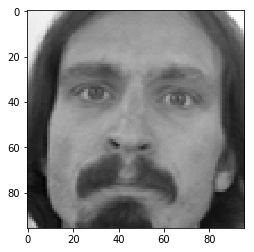

In [123]:
example=faces.iloc[0]
plt.imshow(example['Image'].reshape(96,96),cmap='gray')
plt.scatter(example.iloc[0::2],example.iloc[1::2],marker='x',s=50,c='b')

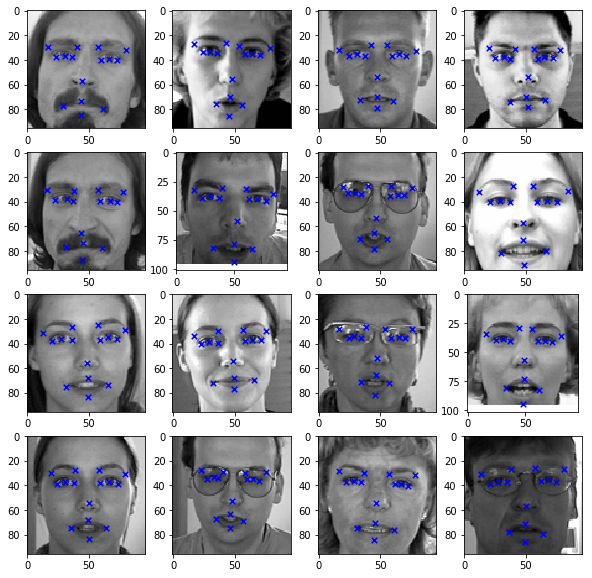

In [200]:
def plot_samples(samples):
    counts=len(samples)
    rowN=math.ceil(np.sqrt(counts))
    fig,arrange=plt.subplots(rowN,rowN,figsize=(10, 10))
    for i in range(counts):
        X=samples.loc[i,'Image']
        Y=samples.loc[i,'left_eye_center_x':'mouth_center_bottom_lip_y']
        arrange[int(i/rowN),i%rowN].imshow(X.reshape(96,96),cmap='gray')
        arrange[int(i/rowN),i%rowN].scatter(Y.iloc[0::2],Y.iloc[1::2],marker='x',s=30,c='b')
            
plot_samples(faces.iloc[0:16,:])